In [ ]:
# Data manipulation and analysis
import pandas as pd  # pip install pandas
import numpy as np  # pip install numpy

# Data visualization
import matplotlib.pyplot as plt  # pip install matplotlib
import seaborn as sns  # pip install seaborn

# Machine learning
from sklearn.model_selection import train_test_split  # pip install scikit-learn
from sklearn.linear_model import LinearRegression  # pip install scikit-learn
from sklearn.metrics import mean_squared_error  # pip install scikit-learn
from sklearn.preprocessing import StandardScaler  # pip install scikit-learn
from sklearn.cluster import KMeans  # pip install scikit-learn
from sklearn.metrics import r2_score  # pip install scikit-learn
import xgboost as xgb  # pip install xgboost
import lightgbm as lgb  # pip install lightgbm

# Statistical analysis
from scipy.stats import ttest_ind  # pip install scipy
import statsmodels.api as sm  # pip install statsmodels

# Data processing
from dask import dataframe as dd  # pip install dask

# Utilities
from joblib import dump, load  # pip install joblib
from tqdm import tqdm  # pip install tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trainData = pd.read_csv('/content/drive/MyDrive/imputed_data (1).csv')

In [ ]:
trainData.sample(5)

,Country Name,Country Code,Time,Time Code,Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],"Air transport, freight (million ton-km) [IS.AIR.GOOD.MT.K1]","Air transport, registered carrier departures worldwide [IS.AIR.DPRT]",Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS],Broad money growth (annual %) [FM.LBL.BMNY.ZG],...,"Short-term debt (% of exports of goods, services and primary income) [DT.DOD.DSTC.XP.ZS]",Income share held by fourth 20% [SI.DST.04TH.20],Income share held by highest 10% [SI.DST.10TH.10],Income share held by highest 20% [SI.DST.05TH.20],Income share held by lowest 10% [SI.DST.FRST.10],Income share held by lowest 20% [SI.DST.FRST.20],Income share held by second 20% [SI.DST.02ND.20],Income share held by third 20% [SI.DST.03RD.20],Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]
1089,Georgia,GEO,2018.0,YR2018,1.439897e+10,3863.888408,0.750900,7.108000e+03,45.705955,13.921002,...,22.771812,22.6,27.5,43.2,2.4,6.5,11.5,16.2,1.760000,2.976571e+08
238,Bangladesh,BGD,2022.0,YR2022,3.684990e+11,9267.568035,1357.734035,2.073240e+05,54.117701,7.502298,...,30.630989,21.5,27.4,42.0,3.5,8.2,12.2,16.0,3.718235,1.694589e+10
1101,Germany,DEU,2015.0,YR2015,2.830970e+12,34656.441910,6986.405445,9.674530e+05,58.080683,13.054621,...,2022.252120,22.6,24.6,39.4,3.2,8.1,12.9,17.0,4.423255,1.518990e+11
2828,Switzerland,CHE,2017.0,YR2017,5.330680e+11,63071.250220,1581.352360,2.164360e+05,58.080683,13.054621,...,1973.365890,22.4,25.5,40.6,3.1,7.7,12.5,16.7,4.374074,3.039714e+10
393,Brazil,BRA,2012.0,YR2012,1.841050e+12,9351.311130,1363.447091,1.002565e+06,79.052862,13.206899,...,11.255509,19.2,42.4,58.1,1.1,3.4,7.4,12.0,5.540000,1.331640e+11


In [ ]:
keywords = ["cost", "supply", "economic", "income", "index", "GDP", "development"]
relevant_columns = [col for col in trainData.columns if any(keyword in col.lower() for keyword in keywords)]

In [ ]:
relevant_data = trainData[relevant_columns]
relevant_data.head()

,Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG],Consumer price index (2010 = 100) [FP.CPI.TOTL],Cost of business start-up procedures (% of GNI per capita) [IC.REG.COST.PC.ZS],"Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]","Cost of business start-up procedures, male (% of GNI per capita) [IC.REG.COST.PC.MA.ZS]","Cost to export, border compliance (US$) [IC.EXP.CSBC.CD]","Cost to import, border compliance (US$) [IC.IMP.CSBC.CD]",Export unit value index (2015 = 100) [TX.UVI.MRCH.XD.WD],...,"Secondary income receipts (BoP, current US$) [BX.TRF.CURR.CD]","Secondary income, other sectors, payments (BoP, current US$) [BM.TRF.PRVT.CD]","Short-term debt (% of exports of goods, services and primary income) [DT.DOD.DSTC.XP.ZS]",Income share held by fourth 20% [SI.DST.04TH.20],Income share held by highest 10% [SI.DST.10TH.10],Income share held by highest 20% [SI.DST.05TH.20],Income share held by lowest 10% [SI.DST.FRST.10],Income share held by lowest 20% [SI.DST.FRST.20],Income share held by second 20% [SI.DST.02ND.20],Income share held by third 20% [SI.DST.03RD.20]
0,1.108013e+10,403.411183,3.672837,97.867911,30.2,30.2,30.2,410.525385,454.243152,100.9,...,2.855676e+09,586056777.7,0.969680,22.071268,28.078791,43.391993,2.688413,6.932515,11.656806,15.959453
1,1.428998e+10,505.230193,3.672837,100.000000,26.7,26.7,26.7,410.525385,454.243152,115.5,...,3.356712e+09,757050076.6,3.825371,22.071268,28.078791,43.391993,2.688413,6.932515,11.656806,15.959453
2,1.663041e+10,566.668101,3.672837,111.804186,25.8,25.8,25.8,410.525385,454.243152,133.8,...,2.374974e+09,452981187.2,2.516439,22.071268,28.078791,43.391993,2.688413,6.932515,11.656806,15.959453
3,1.851180e+10,605.752004,3.672837,119.005731,22.5,22.5,22.5,410.525385,454.243152,126.6,...,2.637537e+09,376815735.8,4.564202,22.071268,28.078791,43.391993,2.688413,6.932515,11.656806,15.959453
4,1.889002e+10,597.356158,3.672837,127.795223,14.4,14.4,14.4,410.525385,454.243152,119.8,...,4.004169e+09,499521139.5,6.682899,22.071268,28.078791,43.391993,2.688413,6.932515,11.656806,15.959453


In [ ]:
cost_of_living_cols = [
    "Consumer price index (2010 = 100) [FP.CPI.TOTL]",
    "Cost of business start-up procedures (% of GNI per capita) [IC.REG.COST.PC.ZS]",
    "Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]",
    "Cost of business start-up procedures, male (% of GNI per capita) [IC.REG.COST.PC.MA.ZS]"
]

economic_factors_cols = [
    "Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]",
    "Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]",
    "Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]",
    "Income share held by highest 10% [SI.DST.10TH.10]",
    "Income share held by highest 20% [SI.DST.05TH.20]",
    "Income share held by lowest 10% [SI.DST.FRST.10]",
    "Income share held by lowest 20% [SI.DST.FRST.20]",
    "Income share held by second 20% [SI.DST.02ND.20]",
    "Income share held by third 20% [SI.DST.03RD.20]",
    "Income share held by fourth 20% [SI.DST.04TH.20]"
]

supply_chain_metrics_cols = [
    "Cost to export, border compliance (US$) [IC.EXP.CSBC.CD]",
    "Cost to import, border compliance (US$) [IC.IMP.CSBC.CD]",
    "Export unit value index (2015 = 100) [TX.UVI.MRCH.XD.WD]",
    "Short-term debt (% of exports of goods, services and primary income) [DT.DOD.DSTC.XP.ZS]"
]

In [ ]:
cost_of_living_data = relevant_data[cost_of_living_cols]
economic_factors_data = relevant_data[economic_factors_cols]
supply_chain_metrics_data = relevant_data[supply_chain_metrics_cols]

In [ ]:
def analyze_cost_impact():
    """
    Analyze how cost of living metrics impact supply chain costs
    """
    # Define target variables (supply chain costs)
    supply_cost_metrics = [
        "Cost to export, border compliance (US$) [IC.EXP.CSBC.CD]",
        "Cost to import, border compliance (US$) [IC.IMP.CSBC.CD]"
    ]

    # Prepare features (cost of living indicators)
    cost_features = [
        "Consumer price index (2010 = 100) [FP.CPI.TOTL]",
        "Cost of business start-up procedures (% of GNI per capita) [IC.REG.COST.PC.ZS]"
    ]

In [ ]:
def analyze_cost_impact():
    """
    Analyze how cost of living metrics impact supply chain costs
    """
    # Define target variables (supply chain costs)
    supply_cost_metrics = [
        "Cost to export, border compliance (US$) [IC.EXP.CSBC.CD]",
        "Cost to import, border compliance (US$) [IC.IMP.CSBC.CD]"
    ]

    # Prepare features (cost of living indicators)
    cost_features = [
        "Consumer price index (2010 = 100) [FP.CPI.TOTL]",
        "Cost of business start-up procedures (% of GNI per capita) [IC.REG.COST.PC.ZS]"
    ]

    # Create correlation matrix
    correlation_data = trainData[cost_features + supply_cost_metrics]
    correlation_matrix = correlation_data.corr()

    # Prepare data for modeling
    X = trainData[cost_features].fillna(method='ffill')
    y = trainData[supply_cost_metrics].fillna(method='ffill')

    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    model = xgb.XGBRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate impact scores
    feature_importance = pd.DataFrame({
        'Feature': cost_features,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Visualize correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation between Cost of Living and Supply Chain Metrics')
    plt.tight_layout()

    # Create time series plot if time data is available
    if 'Year' in trainData.columns:
        plt.figure(figsize=(12, 6))
        for metric in supply_cost_metrics:
            plt.plot(trainData['Year'], trainData[metric], label=metric.split('[')[0])
        for cost in cost_features:
            plt.plot(trainData['Year'], trainData[cost], label=cost.split('[')[0], linestyle='--')
        plt.title('Cost of Living vs Supply Chain Costs Over Time')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()

    return {
        'correlation_matrix': correlation_matrix,
        'feature_importance': feature_importance,
        'model_performance': {
            'r2_score': r2_score(y_test, y_pred),
            'mse': mean_squared_error(y_test, y_pred)
        },
        'model': model,
        'test_data': (X_test, y_test, y_pred)
    }

In [ ]:
def generate_insights(analysis_results):
    """
    Generate key insights from the analysis
    """
    insights = {
        'key_correlations': [],
        'impact_factors': [],
        'performance_metrics': {}
    }

    # Extract strongest correlations
    corr_matrix = analysis_results['correlation_matrix']
    for col in corr_matrix.columns:
        if 'Cost to' in col:
            correlations = corr_matrix[col].sort_values(ascending=False)
            insights['key_correlations'].append({
                'target': col,
                'strongest_correlation': {
                    'factor': correlations.index[1],
                    'value': correlations.iloc[1]
                }
            })

    # Extract top impact factors
    insights['impact_factors'] = analysis_results['feature_importance'].to_dict('records')

    # Add model performance metrics
    insights['performance_metrics'] = analysis_results['model_performance']

    return insights

<ipython-input-46-c1615d20441f>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = trainData[cost_features].fillna(method='ffill')
<ipython-input-46-c1615d20441f>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = trainData[supply_cost_metrics].fillna(method='ffill')


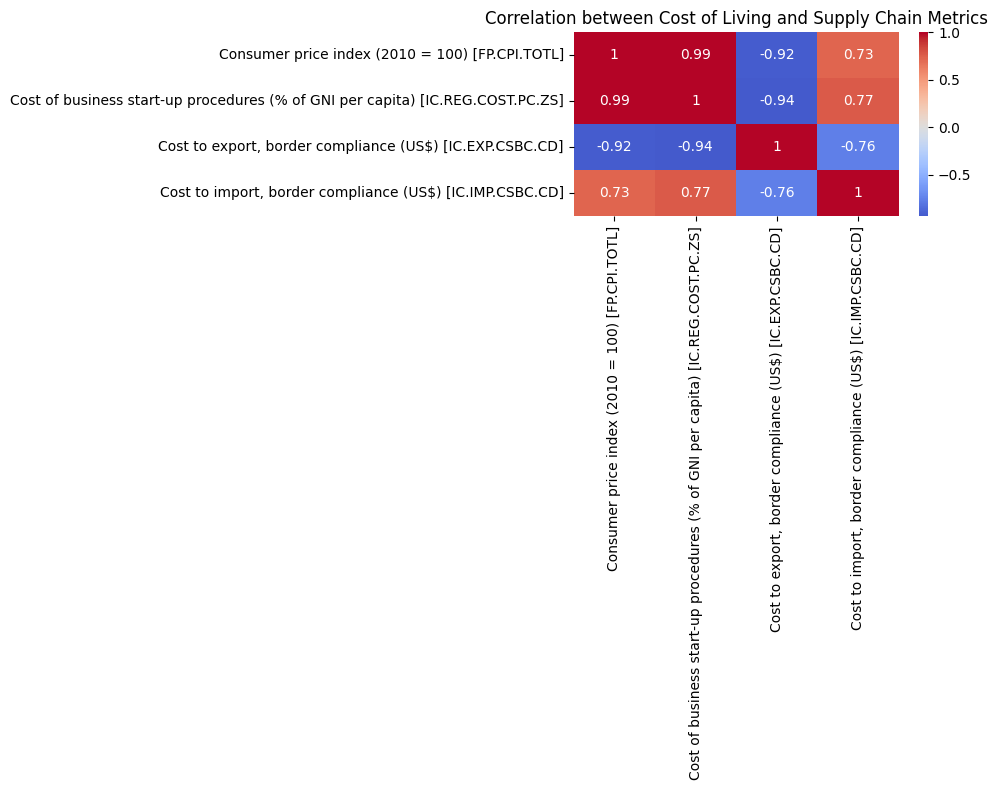

In [ ]:
analysis_results = analyze_cost_impact()
insights = generate_insights(analysis_results)

In [ ]:
def analyze_economic_factors(trainData):
    """
    Analyze how economic factors impact supply chain costs
    """
    # Define supply chain cost metrics
    supply_chain_costs = [
        "Cost to export, border compliance (US$) [IC.EXP.CSBC.CD]",
        "Cost to import, border compliance (US$) [IC.IMP.CSBC.CD]"
    ]

    # Define economic factors
    economic_factors = [
        "Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]",
        "Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]",
        "Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]",
        "Income share held by highest 10% [SI.DST.10TH.10]",
        "Income share held by lowest 20% [SI.DST.FRST.20]"
    ]

    # Create correlation matrix
    correlation_data = trainData[economic_factors + supply_chain_costs]
    correlation_matrix = correlation_data.corr()

    # Prepare data for modeling
    X = trainData[economic_factors].ffill().bfill()
    y = trainData[supply_chain_costs].ffill().bfill()

    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model for export costs
    export_model = xgb.XGBRegressor(random_state=42)
    export_model.fit(X_train_scaled, y_train.iloc[:, 0])  # First column is export costs

    # Train model for import costs
    import_model = xgb.XGBRegressor(random_state=42)
    import_model.fit(X_train_scaled, y_train.iloc[:, 1])  # Second column is import costs

    # Calculate feature importance for both models
    export_importance = pd.DataFrame({
        'Feature': economic_factors,
        'Importance': export_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    import_importance = pd.DataFrame({
        'Feature': economic_factors,
        'Importance': import_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Visualize correlations
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation between Economic Factors and Supply Chain Costs')
    plt.tight_layout()

    # Create feature importance plots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Export costs feature importance
    sns.barplot(data=export_importance, x='Importance', y='Feature', ax=ax1)
    ax1.set_title('Economic Factors Impact on Export Costs')

    # Import costs feature importance
    sns.barplot(data=import_importance, x='Importance', y='Feature', ax=ax2)
    ax2.set_title('Economic Factors Impact on Import Costs')

    plt.tight_layout()

    return {
        'correlation_matrix': correlation_matrix,
        'export_importance': export_importance,
        'import_importance': import_importance,
        'models': {
            'export': export_model,
            'import': import_model
        }
    }

In [ ]:
def analyze_regional_variations(trainData):
    """
    Analyze regional variations in supply chain costs
    """
    if 'Region' in trainData.columns:
        # Calculate average costs by region
        regional_costs = trainData.groupby('Region')[
            ["Cost to export, border compliance (US$) [IC.EXP.CSBC.CD]",
             "Cost to import, border compliance (US$) [IC.IMP.CSBC.CD]"]
        ].mean()

        # Visualize regional variations
        plt.figure(figsize=(12, 6))
        regional_costs.plot(kind='bar')
        plt.title('Average Supply Chain Costs by Region')
        plt.xticks(rotation=45)
        plt.tight_layout()

        return regional_costs

    return None

In [ ]:
def generate_economic_insights(analysis_results):
    """
    Generate insights about economic factors' impact on supply chain costs
    """
    insights = {
        'key_economic_drivers': [],
        'regional_patterns': [],
        'recommendations': []
    }

    # Extract top economic drivers
    for factor in analysis_results['export_importance'].head(3).itertuples():
        insights['key_economic_drivers'].append({
            'factor': factor.Feature,
            'impact_on_exports': factor.Importance
        })

    # Add correlations
    corr_matrix = analysis_results['correlation_matrix']
    export_correlations = corr_matrix["Cost to export, border compliance (US$) [IC.EXP.CSBC.CD]"].sort_values(ascending=False)
    import_correlations = corr_matrix["Cost to import, border compliance (US$) [IC.IMP.CSBC.CD]"].sort_values(ascending=False)

    insights['correlations'] = {
        'export': export_correlations,
        'import': import_correlations
    }

    return insights


Top Economic Drivers of Supply Chain Costs:

Factor: Adjusted net national income per capita (current US$) 
Impact on Export Costs: 0.585

Factor: Adjusted net national income (current US$) 
Impact on Export Costs: 0.384

Factor: Adjusted net national income (annual % growth) 
Impact on Export Costs: 0.031

Strongest Economic Correlations with Export Costs:
Adjusted net national income (current US$) : 0.954

Strongest Economic Correlations with Import Costs:
Income share held by lowest 20% : 0.696


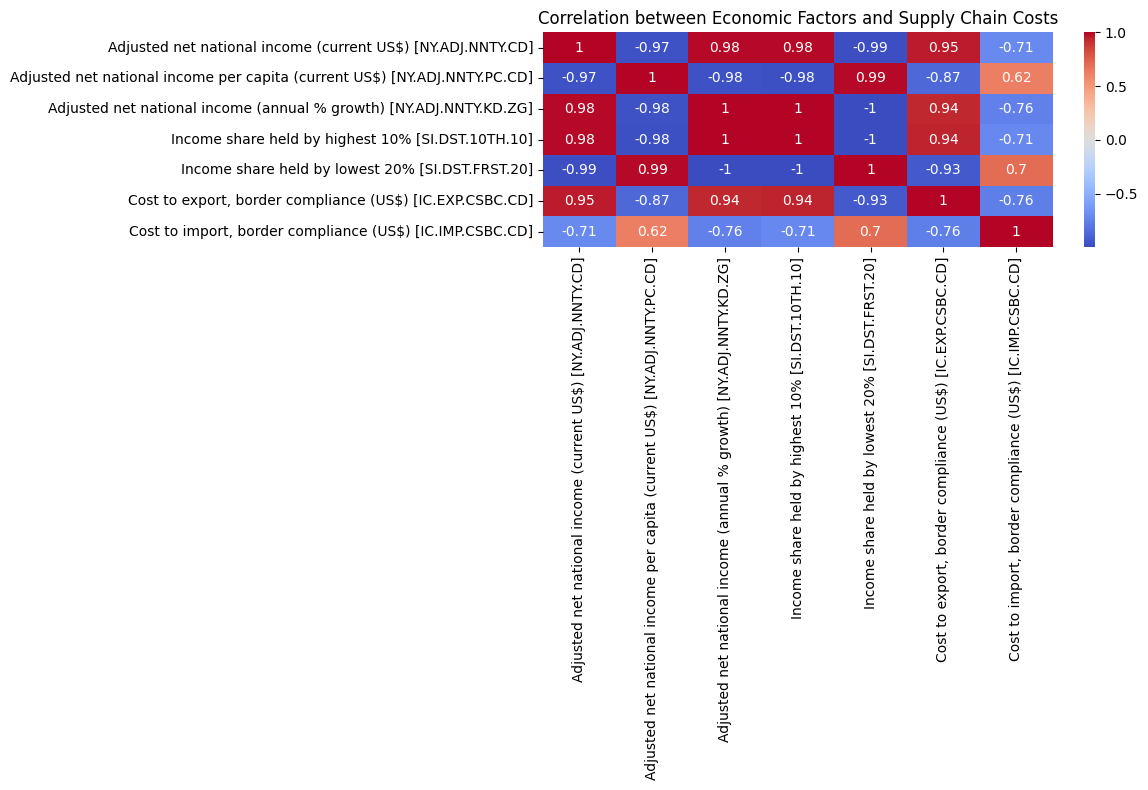

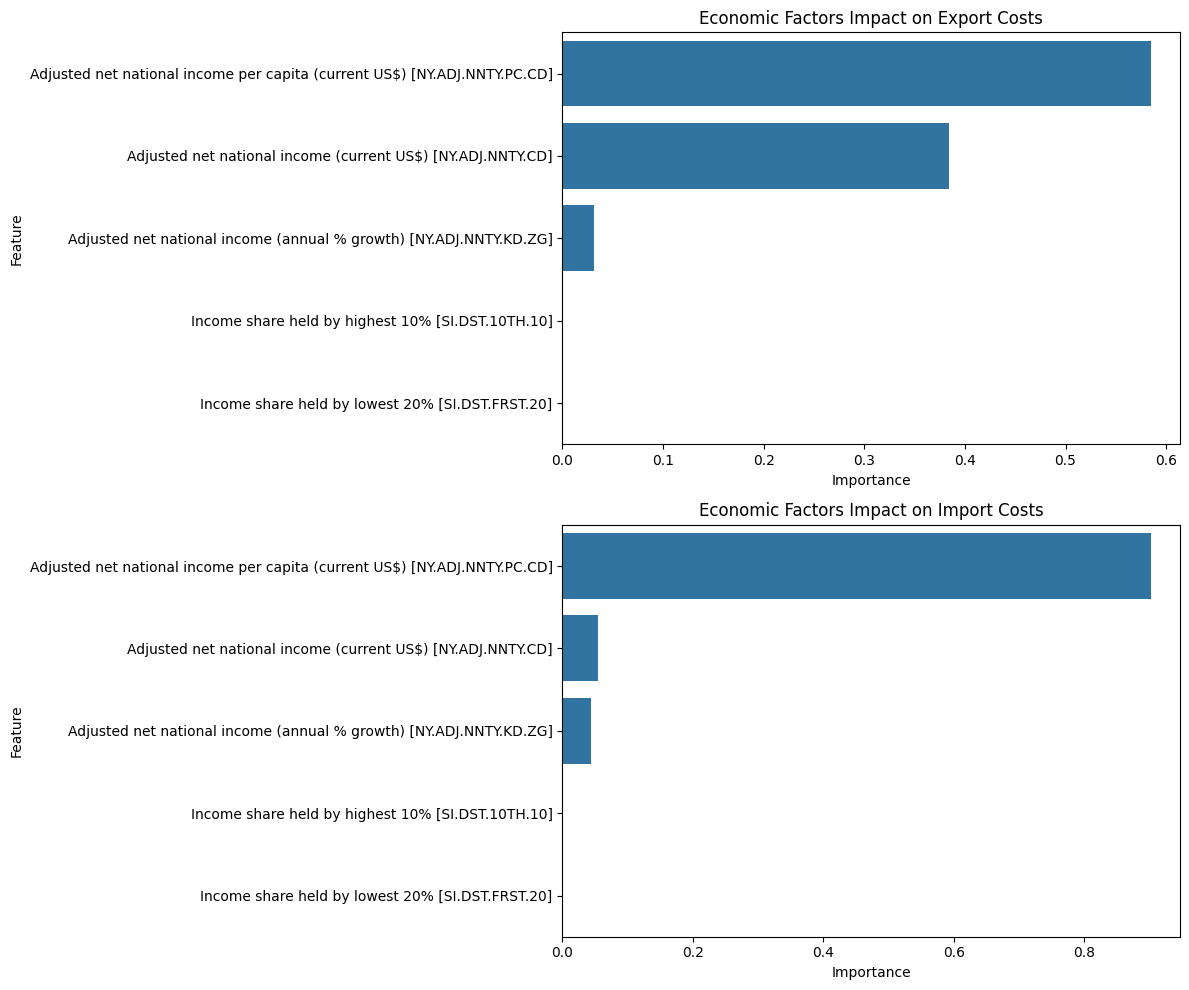

In [ ]:
# Run the analyses
economic_analysis = analyze_economic_factors(trainData)
regional_analysis = analyze_regional_variations(trainData)
insights = generate_economic_insights(economic_analysis)

# Print key findings
print("\nTop Economic Drivers of Supply Chain Costs:")
for driver in insights['key_economic_drivers']:
    print(f"\nFactor: {driver['factor'].split('[')[0]}")
    print(f"Impact on Export Costs: {driver['impact_on_exports']:.3f}")

print("\nStrongest Economic Correlations with Export Costs:")
for factor, corr in insights['correlations']['export'].items():
    if 'Cost to export' not in factor:
        print(f"{factor.split('[')[0]}: {corr:.3f}")
        if abs(corr) > 0.5:  # Only print strong correlations
            break

print("\nStrongest Economic Correlations with Import Costs:")
for factor, corr in insights['correlations']['import'].items():
    if 'Cost to import' not in factor:
        print(f"{factor.split('[')[0]}: {corr:.3f}")
        if abs(corr) > 0.5:  # Only print strong correlations
            break

In [ ]:
def analyze_cost_mitigation_strategies(trainData):
    """
    Analyze potential strategies for mitigating supply chain costs
    """
    # Define key metrics
    cost_metrics = [
        "Cost to export, border compliance (US$) [IC.EXP.CSBC.CD]",
        "Cost to import, border compliance (US$) [IC.IMP.CSBC.CD]"
    ]

    economic_indicators = [
        "Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]",
        "Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]"
    ]

    # Prepare data
    analysis_data = trainData[cost_metrics + economic_indicators].copy()
    analysis_data = analysis_data.ffill().bfill()

    # Normalize data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(analysis_data)
    scaled_df = pd.DataFrame(scaled_data, columns=analysis_data.columns)

    # Identify cost patterns using clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    cost_clusters = kmeans.fit_predict(scaled_df[cost_metrics])

    # Analyze cost elasticity
    elasticity_model = LinearRegression()
    elasticity_model.fit(
        scaled_df[economic_indicators],
        scaled_df[cost_metrics]
    )

    # Calculate cost sensitivity
    cost_sensitivity = pd.DataFrame({
        'factor': economic_indicators,
        'export_sensitivity': elasticity_model.coef_[0],
        'import_sensitivity': elasticity_model.coef_[1]
    })

    # Identify optimal strategies based on clusters
    cluster_strategies = []
    for i in range(3):
        cluster_data = analysis_data[cost_clusters == i]
        cluster_strategies.append({
            'cluster': i,
            'avg_export_cost': cluster_data[cost_metrics[0]].mean(),
            'avg_import_cost': cluster_data[cost_metrics[1]].mean(),
            'size': len(cluster_data)
        })

    return {
        'cost_sensitivity': cost_sensitivity,
        'cluster_strategies': cluster_strategies,
        'clusters': cost_clusters,
        'elasticity_model': elasticity_model
    }

In [ ]:
def generate_mitigation_strategies(analysis_results):
    """
    Generate specific strategies based on analysis results
    """
    strategies = {
        'cost_reduction': [],
        'efficiency_improvements': [],
        'risk_mitigation': []
    }

    # Cost reduction strategies based on sensitivity
    sensitivity = analysis_results['cost_sensitivity']
    for _, row in sensitivity.iterrows():
        if abs(row['export_sensitivity']) > abs(row['import_sensitivity']):
            strategies['cost_reduction'].append({
                'factor': row['factor'],
                'strategy': 'Focus on export cost optimization',
                'impact_score': abs(row['export_sensitivity'])
            })
        else:
            strategies['cost_reduction'].append({
                'factor': row['factor'],
                'strategy': 'Focus on import cost optimization',
                'impact_score': abs(row['import_sensitivity'])
            })

    # Efficiency improvements based on cluster analysis
    for cluster in analysis_results['cluster_strategies']:
        if cluster['avg_export_cost'] > cluster['avg_import_cost']:
            strategies['efficiency_improvements'].append({
                'cluster': cluster['cluster'],
                'strategy': 'Optimize export processes',
                'potential_saving': cluster['avg_export_cost'] - cluster['avg_import_cost']
            })
        else:
            strategies['efficiency_improvements'].append({
                'cluster': cluster['cluster'],
                'strategy': 'Optimize import processes',
                'potential_saving': cluster['avg_import_cost'] - cluster['avg_export_cost']
            })

    return strategies

In [ ]:
def visualize_strategy_analysis(analysis_results, trainData):
    """
    Create visualizations for strategy analysis
    """
    # Cost sensitivity plot
    plt.figure(figsize=(10, 6))
    sensitivity_data = analysis_results['cost_sensitivity']

    x = np.arange(len(sensitivity_data))
    width = 0.35

    plt.bar(x - width/2, sensitivity_data['export_sensitivity'],
            width, label='Export Sensitivity')
    plt.bar(x + width/2, sensitivity_data['import_sensitivity'],
            width, label='Import Sensitivity')

    plt.xlabel('Economic Factors')
    plt.ylabel('Cost Sensitivity')
    plt.title('Supply Chain Cost Sensitivity to Economic Factors')
    plt.xticks(x, sensitivity_data['factor'], rotation=45)
    plt.legend()
    plt.tight_layout()

    # Cluster analysis plot
    plt.figure(figsize=(10, 6))
    for i, cluster in enumerate(analysis_results['cluster_strategies']):
        plt.scatter(cluster['avg_export_cost'],
                   cluster['avg_import_cost'],
                   s=cluster['size']*50,
                   label=f'Cluster {i}')

    plt.xlabel('Average Export Cost')
    plt.ylabel('Average Import Cost')
    plt.title('Supply Chain Cost Clusters')
    plt.legend()
    plt.tight_layout()


COST REDUCTION STRATEGIES:

Factor: Adjusted net national income per capita (current US$) 
Recommended Strategy: Focus on import cost optimization
Potential Impact Score: 2.414

Factor: Adjusted net national income (annual % growth) 
Recommended Strategy: Focus on import cost optimization
Potential Impact Score: 3.110

EFFICIENCY IMPROVEMENT OPPORTUNITIES:

Cluster 0:
Recommended Strategy: Optimize import processes
Potential Cost Savings: $27.96

Cluster 1:
Recommended Strategy: Optimize export processes
Potential Cost Savings: $945,500,000,000,000,000.00

Cluster 2:
Recommended Strategy: Optimize export processes
Potential Cost Savings: $386,997,600,000,000,000.00


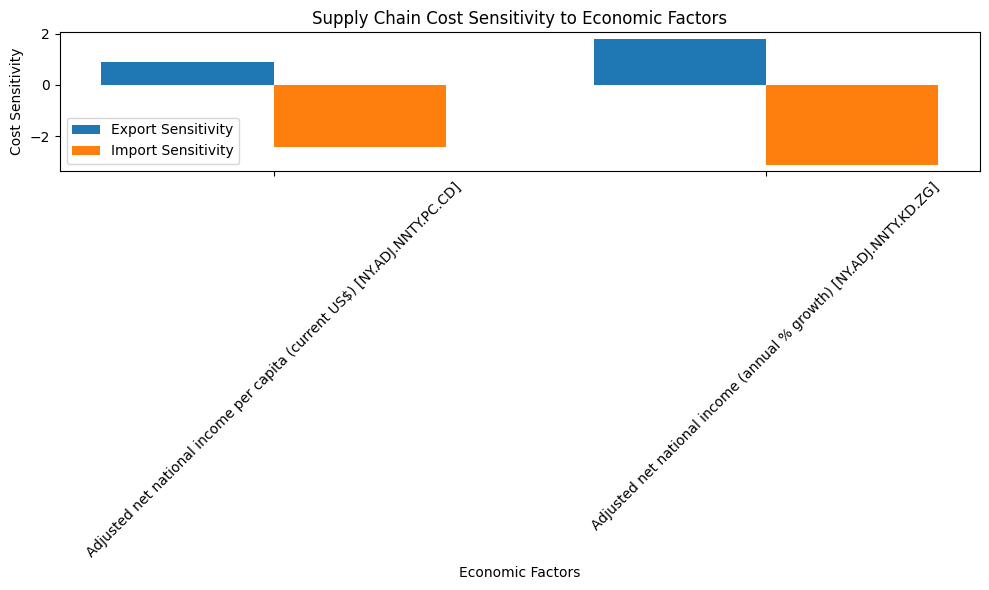

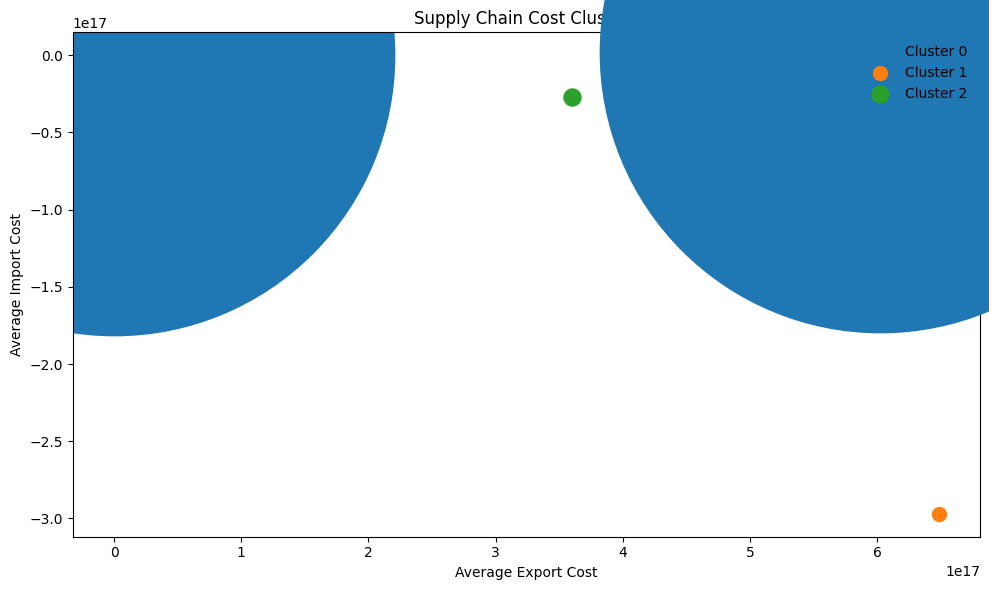

In [ ]:
# Run strategy analysis
strategy_analysis = analyze_cost_mitigation_strategies(trainData)
mitigation_strategies = generate_mitigation_strategies(strategy_analysis)
visualize_strategy_analysis(strategy_analysis, trainData)

# Print recommended strategies
print("\nCOST REDUCTION STRATEGIES:")
for strategy in mitigation_strategies['cost_reduction']:
    print(f"\nFactor: {strategy['factor'].split('[')[0]}")
    print(f"Recommended Strategy: {strategy['strategy']}")
    print(f"Potential Impact Score: {strategy['impact_score']:.3f}")

print("\nEFFICIENCY IMPROVEMENT OPPORTUNITIES:")
for strategy in mitigation_strategies['efficiency_improvements']:
    print(f"\nCluster {strategy['cluster']}:")
    print(f"Recommended Strategy: {strategy['strategy']}")
    print(f"Potential Cost Savings: ${strategy['potential_saving']:,.2f}")